In [ ]:
def stack_percentage_bar(results, horizontal=False, annotate='number'):
    import sys
    """\
    results : pandas.DataFrame
        results.index is the name of each sample.
        results.columns is the label of each category
    horizontal: bool
        If the figure should be horizontal.
    """
    # the following modules should been loaded before
    #import numpy as np
    #import matplotlib as mpl
    #mpl.rcParams['pdf.fonttype'] = 42
    #mpl.rcParams['ps.fonttype'] = 42
    #mpl.rcParams['font.sans-serif'] = 'Helvetica'
    #import matplotlib.pyplot as plt
    #import seaborn as sns
    percentage = results.div(results.sum(axis=1), axis=0) * 100
    percentage_cum = percentage.cumsum(axis=1)
    percentage_cum.loc[:, percentage_cum.shape[1] - 1] = 100.0
    category_colors = plt.get_cmap('RdBu_r')(np.linspace(
        0.15, 0.85, results.shape[1]))
    if horizontal:
        fig, ax = plt.subplots(figsize=(6.4 * .75, 4.8))
        ax.invert_yaxis()
        ax.set_xlim(0, 100)
        for i, (category_name,
                color) in enumerate(zip(results.columns, category_colors)):
            widths = percentage.iloc[:, i]
            starts = percentage_cum.iloc[:, i] - widths
            ax.barh(results.index,
                    widths,
                    left=starts,
                    height=0.5,
                    label=category_name,
                    color=color)
            xcenters = starts + widths / 2
            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.33 else (
                'grey' if r * g * b < 0.66 else 'black')
            if annotate == 'number':
                text = [f'{x:d}' for x in results.iloc[:, i]]
            elif annotate == 'percentage':
                text = [f'{x/100:.2%}' for x in percentage.iloc[:, i]]
            else:
                sys.stdout.write(
                    f'Invalide annotate input: {annotate}. Use default parameters number.'
                )
                text = [f'{x:d}' for x in results.iloc[:, i]]
            for y, (x, c) in enumerate(zip(xcenters, text)):
                ax.text(x, y, c, ha='center', va='center', color=text_color)
        ax.set_xticks(np.arange(0, 120, 20))
        ax.set_xticklabels(np.arange(0, 120, 20))
        ax.set_xlabel('Percentage')
        ax.set_yticks(np.arange(percentage.shape[0]))
        ax.set_yticklabels(percentage.index)
        ax.set_ylabel('Sample')
        ax.legend(ncol=results.shape[1],
                  bbox_to_anchor=(0, 1),
                  loc='lower left',
                  fontsize='small')
    else:
        fig, ax = plt.subplots(figsize=(6.4 * .75, 4.8))
        ax.set_ylim(0, 100)
        for i, (category_name,
                color) in enumerate(zip(results.columns, category_colors)):
            hights = percentage.iloc[:, i]
            starts = percentage_cum.iloc[:, i] - hights
            ax.bar(results.index,
                   hights,
                   bottom=starts,
                   width=0.5,
                   label=category_name,
                   color=color)
            xcenters = starts + hights / 2
            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.33 else (
                'grey' if r * g * b < 0.66 else 'black')
            if annotate == 'number':
                text = [f'{x:d}' for x in results.iloc[:, i]]
            elif annotate == 'percentage':
                text = [f'{x/100:.2%}' for x in percentage.iloc[:, i]]
            else:
                sys.stdout.write(
                    f'Invalide annotate input: {annotate}. Use default parameters number.'
                )
                text = [f'{x:d}' for x in results.iloc[:, i]]
            for x, (c, y) in enumerate(zip(text, xcenters)):
                ax.text(x, y, c, ha='center', va='center', color=text_color)
        ax.set_xticks(np.arange(results.shape[0]))
        ax.set_xticklabels(percentage.index, ) #rotation=45, ha='right'
#         ax.set_xlabel('Sample')
        ax.set_yticks(np.arange(0, 120, 20))
        ax.set_yticklabels(np.arange(0, 120, 20))
        ax.set_ylabel('Percentage')
        ax.legend(bbox_to_anchor=(1, 0), loc='lower left')
    return fig, ax

In [ ]:
diff_gene_summary = pd.DataFrame()
diff_gene_summary['up_ZGA'] = [len(diff_genes_in_ZGAlist['HDpercent10']['up']),
                                    len(diff_genes_in_ZGAlist['HDpercent5']['up']),
                                    len(diff_genes_in_ZGAlist['KCl']['up']),]

diff_gene_summary['up_nonZGA'] = [len(diff_genes['HDpercent10']['up']) - len(diff_genes_in_ZGAlist['HDpercent10']['up']),
                                        len(diff_genes['HDpercent5']['up']) - len(diff_genes_in_ZGAlist['HDpercent5']['up']),
                                        len(diff_genes['KCl']['up']) - len(diff_genes_in_ZGAlist['KCl']['up']),]

diff_gene_summary['down_ZGA'] = [len(diff_genes_in_ZGAlist['HDpercent10']['down']),
                                      len(diff_genes_in_ZGAlist['HDpercent5']['down']),
                                      len(diff_genes_in_ZGAlist['KCl']['down']),]

diff_gene_summary['down_nonZGA'] = [len(diff_genes['HDpercent10']['down']) - len(diff_genes_in_ZGAlist['HDpercent10']['down']),
                                          len(diff_genes['HDpercent5']['down']) - len(diff_genes_in_ZGAlist['HDpercent5']['down']),
                                          len(diff_genes['KCl']['down']) - len(diff_genes_in_ZGAlist['KCl']['down']),]

diff_gene_summary.index = ['10% 1,6-HD', '5% 1,6-HD', 'KCl']
diff_gene_summary

,up_ZGA,up_nonZGA,down_ZGA,down_nonZGA
"10% 1,6-HD",5,68,69,549
"5% 1,6-HD",4,131,12,306
KCl,11,188,4,371


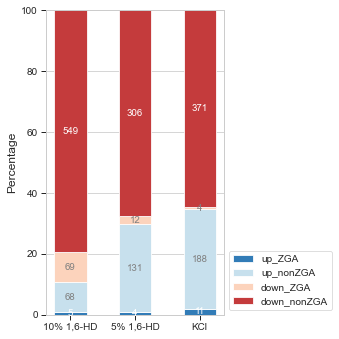

In [ ]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):

    fig, ax = stack_percentage_bar(diff_gene_summary,
                                   horizontal=False,
                                   annotate='number')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/early_embryo_network/figures/make8_16HD_KCl_RNAseq_DiffGene_summary.pdf',
                transparent=True)
    
